#### 2. Consider the diffusion equation:
$$
u_t = u_{xx}, \quad 0\le x\le 1, \quad t\ge 0
$$
with initial and boundary conditions
$$
u(x, 0) = \sin\left(\frac{1}{2}\pi x\right) + \frac{1}{2}\sin(2\pi x), \quad u(0, t) = 0, \quad u(1,t) = e^{-\pi^2 t/4}, \quad t\ge 0.
$$
Solve the problem using Forward Euler finite difference method with $\mu=0.5$ and $\mu=0.509$

#### Derivation of Exact Solution

##### 1. Problem Statement
To solve the one-dimensional diffusion equation：
$$
u_t = u_{xx}, \quad 0 \le x \le 1, \quad t \ge 0
$$

Initial Condition:
$$
u(x,0) = \sin\left(\frac{\pi}{2}x\right) + \frac{1}{2}\sin(2\pi x)
$$

Boundary Conditions:
$$
u(0,t) = 0, \quad u(1,t) = e^{-\pi^2 t/4}
$$

---

##### 2. Solution Strategy: Principle of Superposition
Since the heat equation is linear, the general solution can be constructed by superimposing solutions that satisfy the differential equation.The initial condition is composed of two distinct sine terms. We can determine the time evolution for each term separately.
For the diffusion equation $u_t = u_{xx}$, a spatial mode of the form $\sin(kx)$ decays over time according to $e^{-k^2 t}$.
$$
\phi(x,t) = e^{-k^2 t} \sin(kx)
$$
We apply this to the two terms in the initial condition.

---

##### 3. Step-by-Step Derivation

**Term 1:**
- **Initial component**： $\sin\left(\frac{\pi}{2}x\right)$
- **Wavenumber ($k$)**： $k = \frac{\pi}{2}$。
- **Decay rate ($k^2$)**： $k^2 = \left(\frac{\pi}{2}\right)^2 = \frac{\pi^2}{4}$。
- **Corresponding solution**：
    $$
    u_1(x,t) = e^{-(\frac{\pi}{2})^2 t} \sin\left(\frac{\pi}{2}x\right)
    $$
- **Boundary check**：
    - $x=0$: $\sin(0)=0$
    - $x=1$: $\sin(\frac{\pi}{2})=1 \implies u_1(1,t) = e^{-\frac{\pi^2}{4} t}$

**Term 2:**
- **Initial component**： $\frac{1}{2}\sin(2\pi x)$
- **Wavenumber ($k$)**： $k = 2\pi$。
- **Decay rate ($k^2$)**： $k^2 = (2\pi)^2 = 4\pi^2$。
- **Corresponding solution**：
    $$
    u_2(x,t) = \frac{1}{2} e^{-(2\pi)^2 t} \sin(2\pi x)
    $$
- **Boundary check**：
    - $x=0$: $\sin(0)=0$
    - $x=1$: $\sin(2\pi)=0 \implies u_2(1,t) = 0$
        This term does not interfere with the boundary condition established by the first term.

---

##### 4. Final Exact Solution
By the principle of linearity, the total solution is the sum of the individual components:

$$
u(x,t) = u_1(x,t) + u_2(x,t)
$$

Conclusion:

$$
u(x,t) = e^{-\left(\frac{\pi}{2}\right)^2 t} \sin\left(\frac{\pi}{2}x\right) + \frac{1}{2} e^{-(2\pi)^2 t} \sin(2\pi x)
$$

---

##### 5. Verification
1. **PDE check:** Both terms are of the form $e^{-k^2 t}\sin(kx)$, which satisfies $u_t = u_{xx}$.
2. **IC check ($t=0$):** The exponential terms become 1, recovering the initial condition exactly.
3. **BC check ($x=0$):** $\sin(0) + \sin(0) = 0$.(Satisfied)
4. **BC check ($x=1$):**
$$
u(1,t) = e^{-\pi^2 t/4}(1) + \frac{1}{2}e^{-4\pi^2 t}(0) = e^{-\pi^2 t/4}
$$
(Satisfied)

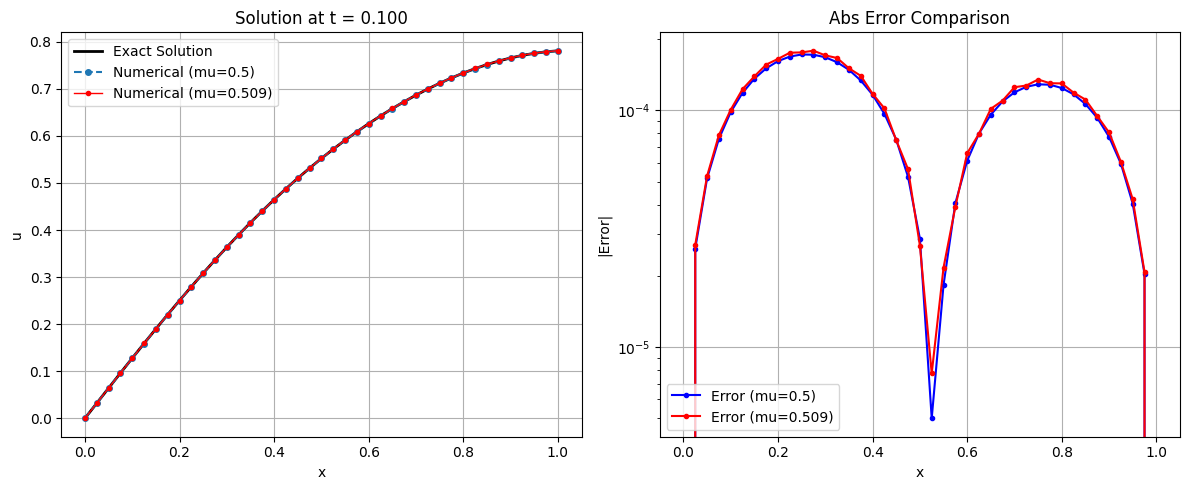

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def exact_solution(x, t):
    """Exact Solution"""
    term1 = np.exp(-np.pi**2 * t / 4) * np.sin(0.5 * np.pi * x)
    term2 = 0.5 * np.exp(-4 * np.pi**2 * t) * np.sin(2 * np.pi * x)
    return term1 + term2

def solve_heat_equation(mu, N, t_final):
    """
    Using Forward Euler
    mu: D*dt/dx^2, D = 1
    N: number of partition
    t_final
    """
    # 1. Grid
    dx = 1.0 / N
    dt = mu * (dx ** 2)
    x = np.linspace(0, 1, N + 1)
    
    # 2. Initial Condition
    u = np.sin(0.5 * np.pi * x) + 0.5 * np.sin(2 * np.pi * x)
    
    # 用來存儲結果以便繪圖
    current_time = 0
    
    # 3. Time iteration
    while current_time < t_final:
        u_next = np.zeros_like(u)
        
        # Finite Difference Scheme
        # u_j^{n+1} = u_j^n + mu * (u_{j+1}^n - 2u_j^n + u_{j-1}^n)
        for j in range(1, N):
            u_next[j] = u[j] + mu * (u[j+1] - 2*u[j] + u[j-1])
            
        current_time += dt
        
        # Boundary Conditions
        u_next[0] = 0.0  # Left
        u_next[-1] = np.exp(-np.pi**2 * current_time / 4) # Right
        
        u = u_next 
        
    return x, u, current_time

# main
N_grid = 40  
T_end = 0.1 

# mu = 0.5 
x_5, u_5, t_5 = solve_heat_equation(mu=0.5, N=N_grid, t_final=T_end)

# mu = 0.509
x_509, u_509, t_509 = solve_heat_equation(mu=0.509, N=N_grid, t_final=T_end)

u_ex5 = exact_solution(x_5, t_5)
u_ex509 = exact_solution(x_509, t_509)

# --- Plot ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_5, u_ex5, 'k-', linewidth=2, label='Exact Solution')
plt.plot(x_5, u_5, 'o--', markersize=4, label='Numerical (mu=0.5)')
plt.plot(x_509, u_509, 'r.-', linewidth=1, label='Numerical (mu=0.509)')
plt.title(f'Solution at t = {T_end:.3f}')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
error_stable = np.abs(u_5 - u_ex5)
error_unstable = np.abs(u_509 - u_ex509(x_509, t_509))

plt.plot(x_5, error_stable, 'b.-', label='Error (mu=0.5)')
plt.plot(x_509, error_unstable, 'r.-', label='Error (mu=0.509)')
plt.title('Abs Error Comparison')
plt.xlabel('x')
plt.ylabel('|Error|')
plt.yscale('log')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### 3. Consider the diffusion equation:
$$
u_t = u_{xx}, \quad 0\le x\le 1, \quad t\ge 0
$$
with initial and boundary conditions
$$
u(x, 0) = \sin\left(2\pi x\right)e^{x}, \quad u(0, t) = u(1,t) = 0, \quad t\ge 0.
$$
With the aid of Fast Since transform, solve the problem using (a) finite difference method and (b) method of line approach to $T=1$. Find the order of convergence.

##### 1. Problem Statement
We consider the one-dimensional diffusion equation:
$$
u_t = u_{xx}, \quad 0 \le x \le 1, \quad t \ge 0
$$
Initial Condition (IC):
$$
u(x,0) = e^x \sin(2\pi x)
$$
Boundary Conditions (BCs):
$$
u(0,t) = 0, \quad u(1,t) = 0
$$

-----------

##### 2. Derivation of the Exact Solution
The analytic solution is obtained via Separation of Variables as a Fourier Sine Series:
$$
u(x,t) = \sum_{k=1}^{\infty} b_k e^{-(k\pi)^2 t} \sin(k\pi x)
$$
where coefficients $b_k = 2 \int_0^1 e^x \sin(2\pi x) \sin(k\pi x) \, dx$ are computed numerically or analytically.

-----------

##### 3. Numerical Methods via FST
We discretize space with grid size $\Delta x$. The eigenvalues of the discrete Laplacian (central difference) are $\lambda_k = \frac{2}{\Delta x^2}(\cos(k\pi \Delta x) - 1)$.
Using the Fast Sine Transform (FST), we solve the problem in the frequency domain ($\hat{U}_k$)
(a) Finite Difference Method (FDM) Using Backward Euler time stepping (implicit):
$$
\frac{\hat{U}_k^{n+1} - \hat{U}_k^n}{\Delta t} = \lambda_k \hat{U}_k^{n+1} \implies \hat{U}_k^{n+1} = \frac{\hat{U}_k^n}{1 - \Delta t \lambda_k}
$$
This introduces both spatial error $O(\Delta x^2)$ and temporal error $O(\Delta t)$.
(b) Method of Lines (MOL)
Treating time as continuous yields a system of ODEs $\frac{d\hat{U}_k}{dt} = \lambda_k \hat{U}_k$. The solution is exact in time:
$$
\hat{U}_k(T) = \hat{U}_k(0) e^{\lambda_k T}
$$
This eliminates temporal error, leaving only spatial error $O(\Delta x^2)$.

------------

##### 4. Convergence Analysis
We compare the $L_2$ error at $T=1$ for varying grid sizes $N$.
- MOL Slope $\approx 2.0$: Matches the theoretical 2nd-order accuracy of the central difference scheme ($O(\Delta x^2)$)
- FDM Slope $\approx 1.27$: The convergence is degraded because the 1st-order temporal error of Backward Euler ($O(\Delta t)$) dominates the 2nd-order spatial error.
Conclusion: The Method of Lines provides superior accuracy and strictly 2nd-order convergence by performing exact time integration in the spectral domain.

N     | MOL Error       | FDM Error      
----------------------------------------
16    | 3.0355e-07      | 7.7027e-05
32    | 8.0999e-08      | 2.6631e-05
64    | 2.0984e-08      | 1.0689e-05
128   | 5.3448e-09      | 4.7438e-06
256   | 1.3490e-09      | 2.2294e-06


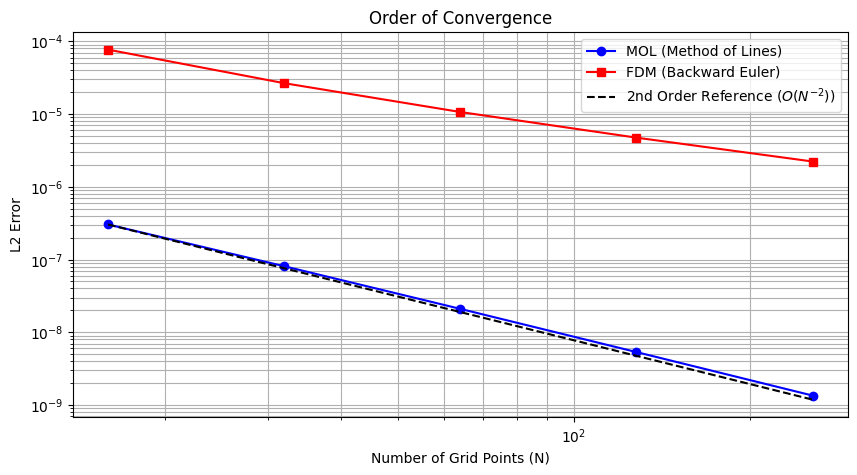


Estimated Order of Convergence:
MOL Slope: 1.95
FDM Slope: 1.27


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dst, idst

# ---------------------------------------------------------

def exact_coeff(k):
    """
    計算初始條件 u(x,0) = e^x sin(2*pi*x) 的傅立葉正弦係數 b_k
    Integral: 2 * int_0^1 e^x sin(2*pi*x) sin(k*pi*x) dx
    """
    from scipy.integrate import quad
    def integrand(x):
        return np.exp(x) * np.sin(2 * np.pi * x) * np.sin(k * np.pi * x)
    val, _ = quad(integrand, 0, 1)
    return 2 * val

def get_exact_solution(x_grid, t, n_terms=100):
    """透過傅立葉級數合成真解"""
    u = np.zeros_like(x_grid)
    for k in range(1, n_terms + 1):
        bk = exact_coeff(k)
        # 熱方程式的解析特徵值為 -(k*pi)^2
        decay = np.exp(-(k * np.pi)**2 * t) 
        u += bk * decay * np.sin(k * np.pi * x_grid)
    return u

# ---------------------------------------------------------

def solve_diffusion_fst(N, T, method='MOL'):
    """
    N: dx = 1/(N+1)
    T: end time
    method: 'FDM' (Backward Euler) 或 'MOL' (Exact time integration)
    """
    # Grid (不包含邊界 0 和 1，因為已知為 0)
    x = np.linspace(0, 1, N+2)[1:-1]
    dx = 1 / (N + 1)
    
    # IC
    u0 = np.exp(x) * np.sin(2 * np.pi * x)
    
    # 1. Forward Transform (轉到頻域)
    # type=1 對應於 DST-I，適用於 Dirichlet BCs
    u_hat = dst(u0, type=1)
    
    # 2. 計算離散拉普拉斯算子的特徵值 (Eigenvalues of discrete Laplacian)
    # lambda_k = (2/dx^2) * (cos(k*pi*dx) - 1)
    k = np.arange(1, N + 1)
    lambda_k = (2 / dx**2) * (np.cos(k * np.pi * dx) - 1)
    
    # 3. Time Stepping
    if method == 'MOL':
        # (b) Method of Lines: Exact time integration in spectral space
        # d(u_hat)/dt = lambda_k * u_hat  =>  u_hat(T) = u_hat(0) * e^(lambda_k * T)
        u_hat_final = u_hat * np.exp(lambda_k * T)
        
    elif method == 'FDM':
        # (a) Finite Difference (Backward Euler for stability)
        # (u_new - u_old)/dt = lambda_k * u_new
        # => u_new = u_old / (1 - dt * lambda_k)
        dt = dx # 設定 dt 與 dx 同量級 (或更小)
        num_steps = int(T / dt)
        dt = T / num_steps # 修正 dt 以剛好整除
        
        factor = 1.0 / (1.0 - dt * lambda_k)
        u_hat_final = u_hat * (factor ** num_steps) # 重複乘 num_steps 次
        
    # 4. Inverse Transform (轉回時域)
    u_final = idst(u_hat_final, type=1)
    
    # 補回邊界 0
    x_full = np.concatenate(([0], x, [1]))
    u_full = np.concatenate(([0], u_final, [0]))
    
    return x_full, u_full

# ---------------------------------------------------------

T_target = 1.0
grid_sizes = [16, 32, 64, 128, 256]
errors_mol = []
errors_fdm = []

print(f"{'N':<5} | {'MOL Error':<15} | {'FDM Error':<15}")
print("-" * 40)

for N in grid_sizes:
    x_mol, u_mol = solve_diffusion_fst(N, T_target, method='MOL')
    x_fdm, u_fdm = solve_diffusion_fst(N, T_target, method='FDM')
    
    u_ref = get_exact_solution(x_mol, T_target)
    
    err_mol = np.sqrt(np.mean((u_mol - u_ref)**2))
    err_fdm = np.sqrt(np.mean((u_fdm - u_ref)**2))
    
    errors_mol.append(err_mol)
    errors_fdm.append(err_fdm)
    
    print(f"{N:<5} | {err_mol:.4e}      | {err_fdm:.4e}")

# ---------------------------------------------------------

plt.figure(figsize=(10, 5))

# Log-Log Plot
plt.loglog(grid_sizes, errors_mol, 'bo-', label='MOL (Method of Lines)')
plt.loglog(grid_sizes, errors_fdm, 'rs-', label='FDM (Backward Euler)')

# 畫出參考斜率 (Slope = -2，代表二階收斂)
ref_x = np.array(grid_sizes)
ref_y = ref_x**(-2.0) * (errors_mol[0] * grid_sizes[0]**2) # 對齊第一點
plt.loglog(ref_x, ref_y, 'k--', label='2nd Order Reference ($O(N^{-2})$)')

plt.xlabel('Number of Grid Points (N)')
plt.ylabel('L2 Error')
plt.title('Order of Convergence')
plt.legend()
plt.grid(True, which="both", ls="-")
plt.show()

# Order (slope)
slope_mol = np.polyfit(np.log(grid_sizes), np.log(errors_mol), 1)[0]
slope_fdm = np.polyfit(np.log(grid_sizes), np.log(errors_fdm), 1)[0]
print(f"\nEstimated Order of Convergence:")
print(f"MOL Slope: {abs(slope_mol):.2f}")
print(f"FDM Slope: {abs(slope_fdm):.2f}")